In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb
import shap
import optuna
from optuna import Trial
from sklearn.preprocessing import StandardScaler, LabelEncoder
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv').drop(columns=['id'])
test = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv').drop(columns=['id'])

In [3]:
train.shape

(7905, 19)

In [4]:
train.isnull().sum()
# no missings

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

## Exploratory Data Analysis
Will consider target variable for numeric and categorical columns.

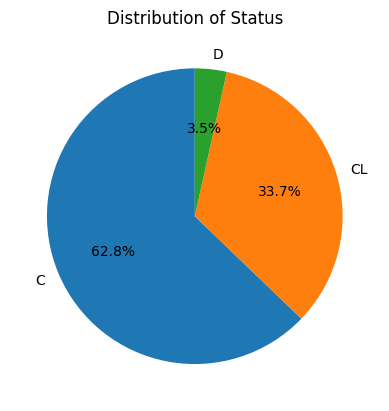

In [5]:
# Look at target variable
plt.pie(train['Status'].value_counts().values, labels=np.unique(train['Status']), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Status')
plt.show()
# unbalanced multi class classification so will need to stratify during any modelling.

In [6]:
train.Status.value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

In [7]:
numeric_columns = train.select_dtypes(include='number').columns.tolist()
categorical_columns = train.select_dtypes(include='object').columns.tolist()
categorical_columns.remove('Status')

In [8]:
# Will look at distributions for numeric variables first
def plot_numeric_distributions(df, numeric_columns, target_variable):

    # Determine the number of subplots required
    num_numeric_columns = len(numeric_columns)
    num_subplots = math.ceil(num_numeric_columns / 2)

    # Create subplots
    fig, axes = plt.subplots(num_subplots, 2, figsize=(12, 4 * num_subplots))
    axes = axes.flatten()

    # Plot distribution plots for each numeric column
    for i in range(num_numeric_columns):
        sns.histplot(data=df, x=numeric_columns[i], hue=target_variable, stat='percent', common_norm=False, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {numeric_columns[i]}')

    # Adjust layout
    plt.tight_layout()
    plt.show()


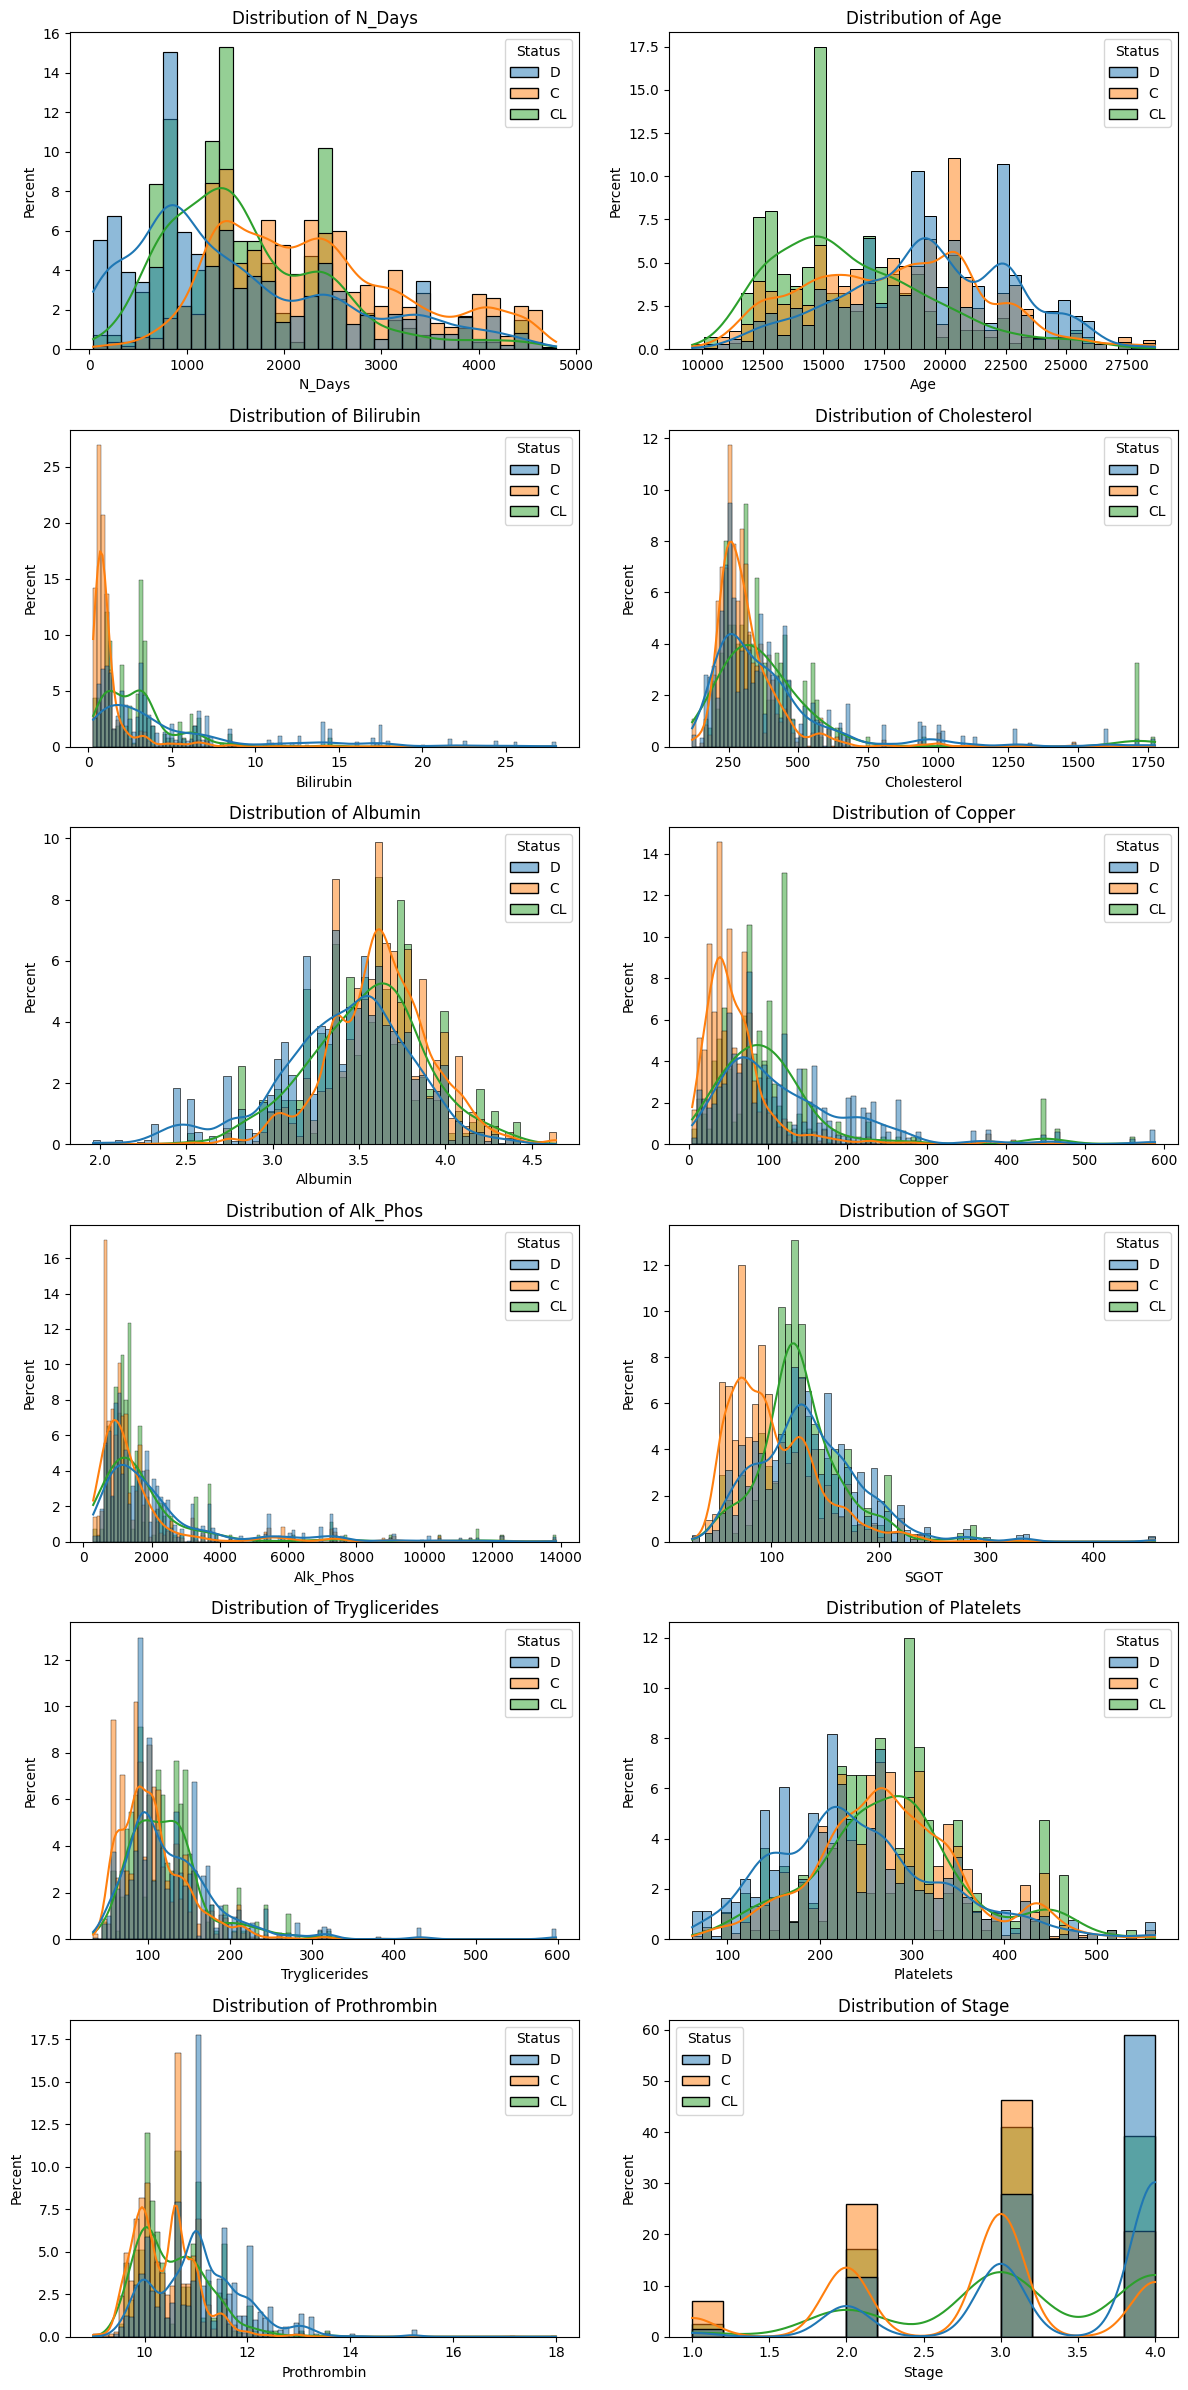

In [9]:
plot_numeric_distributions(train, numeric_columns, 'Status')

The field 'Stage' is actually discrete so will create dummies for it later on.

In [10]:
# Now look at categorical variables
def plot_categorical_distributions(df, categorical_columns, target_variable):

    # Determine the number of subplots required
    num_categorical_columns = len(categorical_columns)
    num_subplots = math.ceil(num_categorical_columns / 2)

    # Create subplots
    fig, axes = plt.subplots(num_subplots, 2, figsize=(12, 4 * num_subplots))
    axes = axes.flatten()

    # Plot bar plots for categorical columns
    for i in range(num_categorical_columns):
        sns.countplot(data=df, x=categorical_columns[i], hue=target_variable, ax=axes[i])
        axes[i].set_title(f'Distribution of {categorical_columns[i]}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

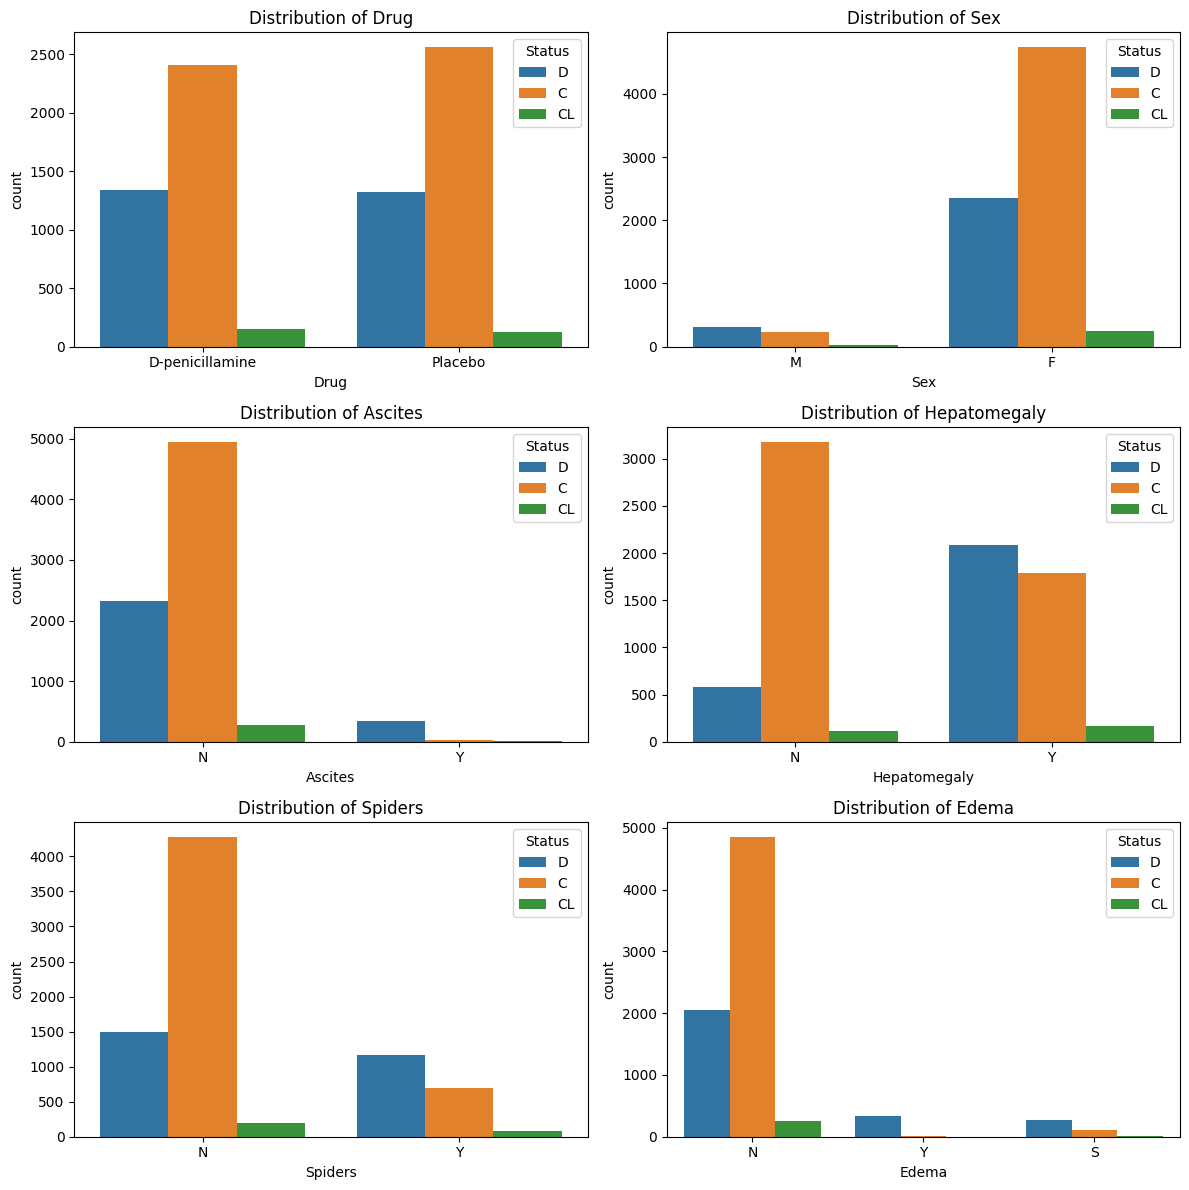

In [11]:
plot_categorical_distributions(train, categorical_columns,  'Status')